In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image, k=0.04, block_size=2, aperture_size=3, threshold=0.01):
    """
    Function to perform Harris corner detection on an image.
    
    :param image: Input image (grayscale).
    :param k: Sensitivity parameter (typically between 0.04 and 0.06).
    :param block_size: Size of the neighborhood considered for corner detection.
    :param aperture_size: Aperture parameter for Sobel operator.
    :param threshold: Threshold for corner detection, below which corners are not considered.
    :return: Image with corners marked.
    """
    # Convert image to grayscale if it's not already
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = np.float32(gray_image)

    # Compute the Harris corner response
    dst = cv2.cornerHarris(gray_image, block_size, aperture_size, k)

    # Dilate to mark the corners
    dst = cv2.dilate(dst, None)

    # Mark the corners on the original image
    image_with_corners = image.copy()
    image_with_corners[dst > threshold * dst.max()] = [0, 0, 255]  # Mark corners with red

    return image_with_corners


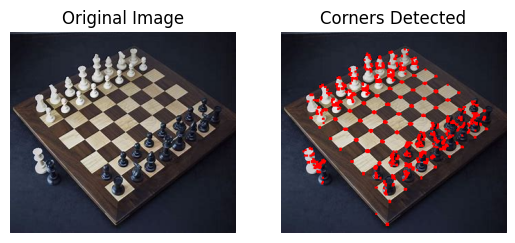

In [18]:

image = cv2.imread('data/chessboard.jpeg')  

# Detect corners
image_with_corners = harris_corner_detection(image)

# Display the original and processed image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Corners Detected')
plt.axis('off')

plt.show()


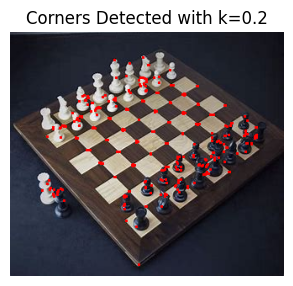

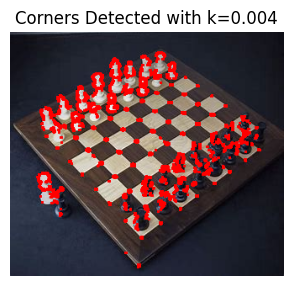

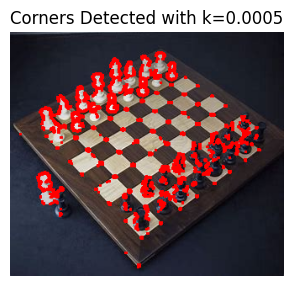

In [14]:
# Varying the sensitivity parameter (k) and observing the result

k_values = [0.2, 0.004, 0.0005]

for k in k_values:
    image_with_corners = harris_corner_detection(image, k=k)
    
    # Display the results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
    plt.title(f'Corners Detected with k={k}')
    plt.axis('off')
    
    plt.show()
